### Text Classification

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
from datasets import load_dataset

emotion_datasets = load_dataset('emotion')
emotion_datasets

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md: 0.00B [00:00, ?B/s]

split/train-00000-of-00001.parquet:   0%|          | 0.00/1.03M [00:00<?, ?B/s]

split/validation-00000-of-00001.parquet:   0%|          | 0.00/127k [00:00<?, ?B/s]

split/test-00000-of-00001.parquet:   0%|          | 0.00/129k [00:00<?, ?B/s]

Generating train split:   0%|          | 0/16000 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/2000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/2000 [00:00<?, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 16000
    })
    validation: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
})

In [ ]:
emotion_datasets['train'].features

{'text': Value('string'),
 'label': ClassLabel(names=['sadness', 'joy', 'love', 'anger', 'fear', 'surprise'])}

In [ ]:
emotion_datasets.set_format("pandas")
emotion_datasets['train'][:6]

,text,label
0,i didnt feel humiliated,0
1,i can go from feeling so hopeless to so damned...,0
2,im grabbing a minute to post i feel greedy wrong,3
3,i am ever feeling nostalgic about the fireplac...,2
4,i am feeling grouchy,3
5,ive been feeling a little burdened lately wasn...,0


In [ ]:
np.unique(emotion_datasets['train']['label'])

array([0, 1, 2, 3, 4, 5])

In [ ]:
# convert formate data into dataframe
import pandas as pd
df_train =emotion_datasets['train'][:]
df_train.head()

,text,label
0,i didnt feel humiliated,0
1,i can go from feeling so hopeless to so damned...,0
2,im grabbing a minute to post i feel greedy wrong,3
3,i am ever feeling nostalgic about the fireplac...,2
4,i am feeling grouchy,3


In [ ]:
valid_df =emotion_datasets['validation'][:]
test_df =emotion_datasets['test'][:]

valid_df.head()

,text,label
0,im feeling quite sad and sorry for myself but ...,0
1,i feel like i am still looking at a blank canv...,0
2,i feel like a faithful servant,2
3,i am just feeling cranky and blue,3
4,i can have for a treat or if i am feeling festive,1


In [ ]:
def label_int_2_str(row):
  return emotion_datasets['train'].features['label'].int2str(row)


df_train['label_name'] =df_train['label'].apply(label_int_2_str)
df_train.head()

,text,label,label_name
0,i didnt feel humiliated,0,sadness
1,i can go from feeling so hopeless to so damned...,0,sadness
2,im grabbing a minute to post i feel greedy wrong,3,anger
3,i am ever feeling nostalgic about the fireplac...,2,love
4,i am feeling grouchy,3,anger


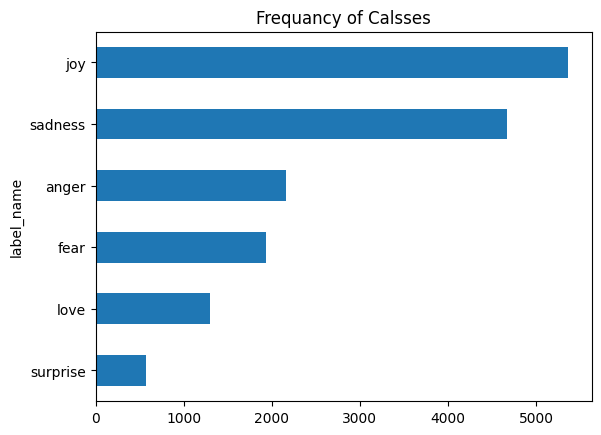

In [ ]:
df_train['label_name'].value_counts(ascending =True).plot.barh()
plt.title("Frequancy of Calsses")
plt.show()

In [ ]:
df_train['words_per_tweet'] =df_train['text'].str.split().apply(len)
df_train.head()

,text,label,label_name,words_per_tweet
0,i didnt feel humiliated,0,sadness,4
1,i can go from feeling so hopeless to so damned...,0,sadness,21
2,im grabbing a minute to post i feel greedy wrong,3,anger,10
3,i am ever feeling nostalgic about the fireplac...,2,love,18
4,i am feeling grouchy,3,anger,4


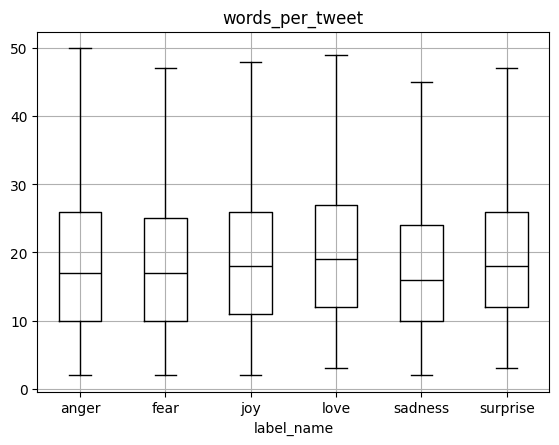

In [ ]:
df_train.boxplot('words_per_tweet',by='label_name',color='black',showfliers=False)
plt.suptitle("")
plt.show()

most tweets are around 15 words long

In [ ]:
# reset dataframe formate
emotion_datasets.reset_format()

### CharacterTokanization

In [ ]:
text ="hello world"
tokens = list(text)
print(tokens)

token2idx ={ch :idx for idx,ch in enumerate(sorted(set(tokens)))}
print(token2idx)

['h', 'e', 'l', 'l', 'o', ' ', 'w', 'o', 'r', 'l', 'd']
{' ': 0, 'd': 1, 'e': 2, 'h': 3, 'l': 4, 'o': 5, 'r': 6, 'w': 7}


In [ ]:
input_idx =[token2idx[token] for token in tokens]
print(input_idx)

[3, 2, 4, 4, 5, 0, 7, 5, 6, 4, 1]


### SubWord Tokanization

In [ ]:
text ="Tokanizing Text is a core task of NLP"

In [ ]:
from transformers import AutoTokenizer

model_name ="distilbert-base-uncased"
tokenizer =AutoTokenizer.from_pretrained(model_name)
encoded_text =tokenizer(text)
encoded_text

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

{'input_ids': [101, 2000, 9126, 6026, 3793, 2003, 1037, 4563, 4708, 1997, 17953, 2361, 102], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]}

In [ ]:
tokens =tokenizer.convert_ids_to_tokens(encoded_text['input_ids'])
tokens

['[CLS]',
 'to',
 '##kan',
 '##izing',
 'text',
 'is',
 'a',
 'core',
 'task',
 'of',
 'nl',
 '##p',
 '[SEP]']

In [ ]:
string =tokenizer.convert_tokens_to_string(tokens)
string

'[CLS] tokanizing text is a core task of nlp [SEP]'

In [ ]:
tokenizer.vocab_size

30522

In [ ]:
# model context size
tokenizer.model_max_length

512

In [ ]:
tokenizer.model_input_names

['input_ids', 'attention_mask']

### Tokenize all dataset

In [ ]:
def tokenize(batch):
  return tokenizer(batch['text'],padding =True,truncation=True)


In [ ]:
# lets try to tokenize first two rwo from my data
for i in emotion_datasets['train'][:2]['text']:
    print(i)


i didnt feel humiliated
i can go from feeling so hopeless to so damned hopeful just from being around someone who cares and is awake


In [ ]:
tokenize(emotion_datasets['train'][:2])

{'input_ids': [[101, 1045, 2134, 2102, 2514, 26608, 102, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [101, 1045, 2064, 2175, 2013, 3110, 2061, 20625, 2000, 2061, 9636, 17772, 2074, 2013, 2108, 2105, 2619, 2040, 14977, 1998, 2003, 8300, 102]], 'attention_mask': [[1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]]}

### Tokanize all data

In [ ]:
encoded_emotions = emotion_datasets.map(tokenize,batched=True,batch_size=None)

Map:   0%|          | 0/16000 [00:00<?, ? examples/s]

Map:   0%|          | 0/2000 [00:00<?, ? examples/s]

Map:   0%|          | 0/2000 [00:00<?, ? examples/s]

In [ ]:
encoded_emotions['train'].column_names

['text', 'label', 'input_ids', 'attention_mask']

### Transformers as Feature extractor

In [ ]:
### Load destil bert as feature extractor model
from transformers import AutoModel
import torch
model_name ="distilbert-base-uncased"
device =torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = AutoModel.from_pretrained(model_name).to(device)


model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

In [ ]:
test_text ="I love python"
encoded_text =tokenizer(test_text,return_tensors='pt')
encoded_text

{'input_ids': tensor([[  101,  1045,  2293, 18750,   102]]), 'attention_mask': tensor([[1, 1, 1, 1, 1]])}

In [ ]:
encoded_text['input_ids'].shape

torch.Size([1, 5])

In [ ]:
# put encoded text in the same device of model
encoded_text={k: v.to(device) for k,v in encoded_text.items()}

In [ ]:
with torch.no_grad(): # without backprobagation , with no computation for gradiant , just I want model to predict
   output =model(**encoded_text)

print(output)

BaseModelOutput(last_hidden_state=tensor([[[-0.1070,  0.0087,  0.0589,  ..., -0.0956,  0.1645,  0.3399],
         [ 0.3325,  0.2071,  0.1053,  ..., -0.0821,  0.5030,  0.5392],
         [ 0.9763,  0.5344,  0.6442,  ..., -0.1834,  0.4155,  0.2026],
         [-0.0284, -0.1119, -0.4100,  ...,  0.1617,  0.0680,  0.1562],
         [ 0.9212,  0.3936, -0.3583,  ...,  0.2807, -0.6110, -0.1698]]],
       device='cuda:0'), hidden_states=None, attentions=None)


In [ ]:
output.last_hidden_state.shape

torch.Size([1, 5, 768])

In [ ]:
# [cls] token
output.last_hidden_state[:,0].size()

torch.Size([1, 768])

In [ ]:
# [cls] token embedding it represent the all meaning of sentence
def extract_last_hidden_state(batch):
  # put encoded text inot device
  encoded_batch ={ k:v.to(device) for k,v in batch.items() if k in tokenizer.model_input_names}

  with torch.no_grad():
    output =model(**encoded_batch)

  # return vector for [cls] token
  return {"hidden_state":output.last_hidden_state[:,0].cpu().numpy()}

In [ ]:
encoded_emotions.column_names

{'train': ['text', 'label', 'input_ids', 'attention_mask'],
 'validation': ['text', 'label', 'input_ids', 'attention_mask'],
 'test': ['text', 'label', 'input_ids', 'attention_mask']}

In [ ]:
encoded_emotions.set_format('torch',columns=['label','input_ids','attention_mask'])

In [ ]:
emotion_hidden =encoded_emotions.map(extract_last_hidden_state,batched=True)

Map:   0%|          | 0/16000 [00:00<?, ? examples/s]

Map:   0%|          | 0/2000 [00:00<?, ? examples/s]

Map:   0%|          | 0/2000 [00:00<?, ? examples/s]

In [ ]:
emotion_hidden['train'].column_names

['text', 'label', 'input_ids', 'attention_mask', 'hidden_state']

- We will use hidden_state as input and label as output

In [ ]:
import numpy as np

x_train =np.array(emotion_hidden['train']['hidden_state'])
y_train =np.array(emotion_hidden['train']['label'])

x_valid =np.array(emotion_hidden['validation']['hidden_state'])
y_valid =np.array(emotion_hidden['validation']['label'])

x_train.shape ,x_valid.shape

((16000, 768), (2000, 768))

In [ ]:
from sklearn.linear_model import LogisticRegression

log =LogisticRegression(max_iter=3000)
log.fit(x_train,y_train)
log.score(x_valid,y_valid)

0.634

In [ ]:
# display conviusion matrix
labels_names =emotion_datasets['train'].features['label'].names


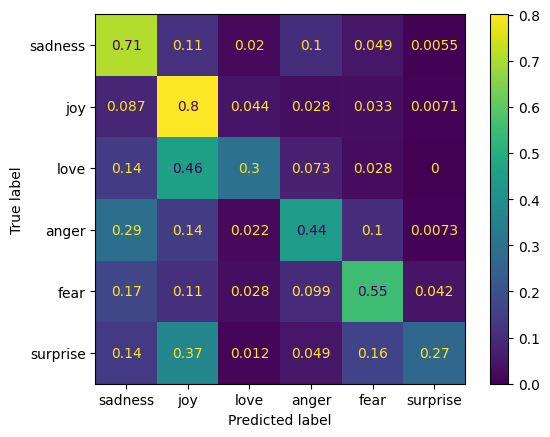

In [ ]:
# measue performance using conv matrix
from sklearn.metrics import ConfusionMatrixDisplay,confusion_matrix

y_pred =log.predict(x_valid)

cv =confusion_matrix(y_valid,y_pred,normalize='true')
display =ConfusionMatrixDisplay(confusion_matrix=cv,display_labels=labels_names)
display.plot()
plt.show()

### Fine Tuning

In [ ]:
from transformers import AutoModelForSequenceClassification
model_id ="distilbert-base-uncased"

num_labels = 6
f_model =AutoModelForSequenceClassification.from_pretrained(model_id,num_labels=num_labels).to(device)

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
## Define performance matrice
from sklearn.metrics import f1_score,accuracy_score
def compute_metrics(pred):
   labels =pred.label_ids
   preds=pred.predictions.argmax(-1)

   f_score =f1_score(labels,preds,average='weighted')
   accuracy =accuracy_score(labels,preds)

   return {"accuracy":accuracy ,"f1":f_score}


In [ ]:
## login to huggingface
from huggingface_hub import notebook_login
notebook_login()

### Training

In [ ]:
import transformers
print(transformers.__version__)


4.57.3


In [ ]:
from transformers import Trainer ,TrainingArguments

batch_size =64
loging_step =len(emotion_datasets['train']) // batch_size
model_name =f"{model_id}_emotion_finetuned"

training_args =TrainingArguments(
    output_dir =model_name,
    num_train_epochs=2,
    learning_rate=2e-5,
    per_device_train_batch_size=batch_size,
    per_device_eval_batch_size=batch_size,
    weight_decay=0.01,
    eval_strategy="epoch",
    disable_tqdm=False,
    logging_steps=loging_step,
    push_to_hub=True,
    log_level="error"
)

In [ ]:
trainer =Trainer(
    model=f_model,
    args=training_args,
    train_dataset =encoded_emotions['train'],
    eval_dataset =encoded_emotions['validation'],
    compute_metrics=compute_metrics,
    tokenizer=tokenizer
)

trainer.train()

/tmp/ipython-input-1075220981.py:1: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer =Trainer(


Epoch,Training Loss,Validation Loss,Accuracy,F1
1,0.217700,0.181771,0.926000,0.927043
2,0.137400,0.150944,0.938500,0.938752


TrainOutput(global_step=500, training_loss=0.17753939056396484, metrics={'train_runtime': 235.0354, 'train_samples_per_second': 136.15, 'train_steps_per_second': 2.127, 'total_flos': 720342861696000.0, 'train_loss': 0.17753939056396484, 'epoch': 2.0})

In [ ]:
pred_output =trainer.predict(encoded_emotions['validation'])

In [ ]:
pred_output

PredictionOutput(predictions=array([[ 5.4902    , -0.83580047, -1.6718765 , -1.3658191 , -1.9297826 ,
        -2.478468  ],
       [ 5.4685287 , -1.0897365 , -2.265397  , -1.2267063 , -1.3534529 ,
        -2.3665943 ],
       [-1.6039338 ,  2.6716084 ,  3.2834816 , -2.1714091 , -2.584074  ,
        -2.6101778 ],
       ...,
       [-1.3384948 ,  5.648151  , -0.34627357, -2.3160744 , -2.5074577 ,
        -2.0714338 ],
       [-2.1657155 ,  4.002497  ,  2.416602  , -2.473718  , -2.613031  ,
        -2.1640358 ],
       [-1.6867495 ,  5.5201516 , -0.93034977, -2.3423605 , -2.0721712 ,
        -0.9603908 ]], dtype=float32), label_ids=array([0, 0, 2, ..., 1, 1, 1]), metrics={'test_loss': 0.15094393491744995, 'test_accuracy': 0.9385, 'test_f1': 0.9387516185946408, 'test_runtime': 4.0313, 'test_samples_per_second': 496.123, 'test_steps_per_second': 7.938})

In [ ]:
y_pred =np.argmax(pred_output.predictions,axis=1)

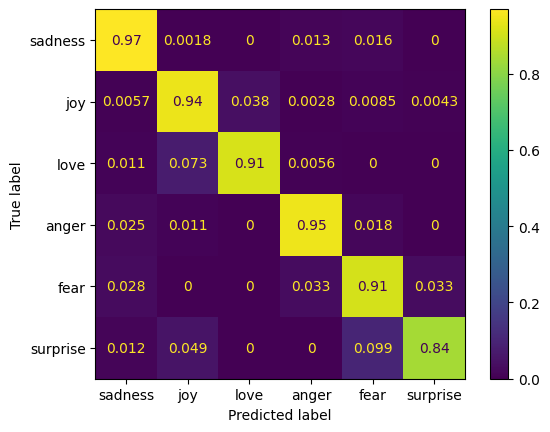

In [ ]:
cv =confusion_matrix(y_valid,y_pred,normalize='true')
display =ConfusionMatrixDisplay(confusion_matrix=cv,display_labels=labels_names)
display.plot()
plt.show()

### Saving Model to HF

In [ ]:
trainer.push_to_hub(commit_message="Training completed!")

Processing Files (0 / 0)      : |          |  0.00B /  0.00B            

New Data Upload               : |          |  0.00B /  0.00B            

  ...netuned/training_args.bin: 100%|##########| 5.91kB / 5.91kB            

  ...75513.0528ad256da2.1810.0: 100%|##########| 5.43kB / 5.43kB            

  ...netuned/model.safetensors:   6%|6         | 16.7MB /  268MB            

  ...75723.0528ad256da2.1810.1: 100%|##########| 6.78kB / 6.78kB            

CommitInfo(commit_url='https://huggingface.co/shroukAdel/distilbert-base-uncased_emotion_finetuned/commit/f7ae06247f5cf92b8ea78110f90bc4b9806b5496', commit_message='Training completed!', commit_description='', oid='f7ae06247f5cf92b8ea78110f90bc4b9806b5496', pr_url=None, repo_url=RepoUrl('https://huggingface.co/shroukAdel/distilbert-base-uncased_emotion_finetuned', endpoint='https://huggingface.co', repo_type='model', repo_id='shroukAdel/distilbert-base-uncased_emotion_finetuned'), pr_revision=None, pr_num=None)

In [ ]:
# load model form huggingface and try it
from transformers import pipeline

model_id="shroukAdel/distilbert-base-uncased_emotion_finetuned"
classifier =pipeline("text-classification",model_id)

custom_tweet = "I saw a movie today and it was really good."

pred =classifier(custom_tweet,return_all_scores =True)
pred



config.json:   0%|          | 0.00/831 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json: 0.00B [00:00, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

/usr/local/lib/python3.12/dist-packages/transformers/pipelines/text_classification.py:111: UserWarning: `return_all_scores` is now deprecated,  if want a similar functionality use `top_k=None` instead of `return_all_scores=True` or `top_k=1` instead of `return_all_scores=False`.
  warnings.warn(


[[{'label': 'LABEL_0', 'score': 0.010282456874847412},
  {'label': 'LABEL_1', 'score': 0.9766159057617188},
  {'label': 'LABEL_2', 'score': 0.0036470992490649223},
  {'label': 'LABEL_3', 'score': 0.004485888406634331},
  {'label': 'LABEL_4', 'score': 0.0023746821098029613},
  {'label': 'LABEL_5', 'score': 0.0025940306950360537}]]

In [ ]:
df =pd.DataFrame(pred[0])
df.head()

,label,score
0,LABEL_0,0.010282
1,LABEL_1,0.976616
2,LABEL_2,0.003647
3,LABEL_3,0.004486
4,LABEL_4,0.002375


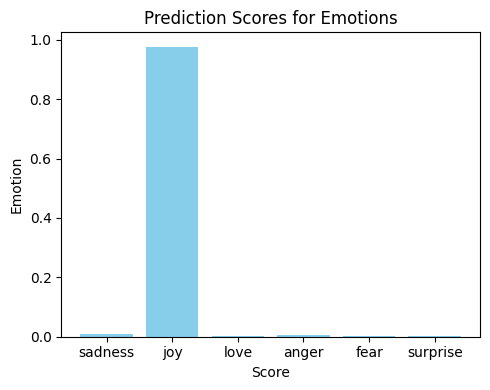

In [ ]:
df['emotion_label'] = df['label'].apply(lambda x: labels_names[int(x.split('_')[1])])
plt.figure(figsize=(5, 4))
plt.bar(df['emotion_label'], df['score'], color='skyblue')
plt.xlabel('Score')
plt.ylabel('Emotion')
plt.title('Prediction Scores for Emotions')
# plt.xlim(0, 1) # Scores are between 0 and 1
plt.tight_layout()
plt.show()